<img src="../images/UBRA_Logo_DATA_TRAIN.png" style="width: 800px;">

## Combining different data sources

In [6]:
pip install xarray netcdf4

  Using cached xarray-2024.9.0-py3-none-any.whl.metadata (11 kB)
  Using cached netCDF4-1.7.1.post2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached cftime-1.6.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.7 kB)
Using cached xarray-2024.9.0-py3-none-any.whl (1.2 MB)
Using cached netCDF4-1.7.1.post2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.2 MB)
Using cached cftime-1.6.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.4 MB)
Note: you may need to restart the kernel to use updated packages.


In [7]:
import matplotlib.pylab as plt
import xarray as xr
import numpy as np
from matplotlib import cm
import pandas as pd
# xr.set_options(display_style="text") #uncomment if you can't display html 

In [8]:
ds = xr.open_dataset('../data/air.2m.gauss.2021.nc')

In [9]:
ds

<xarray.Dataset> Size: 14MB
Dimensions:    (lat: 94, lon: 192, time: 196, nbnds: 2)
Coordinates:
  * lat        (lat) float32 376B 88.54 86.65 84.75 ... -84.75 -86.65 -88.54
  * lon        (lon) float32 768B 0.0 1.875 3.75 5.625 ... 354.4 356.2 358.1
  * time       (time) datetime64[ns] 2kB 2021-01-01 2021-01-02 ... 2021-07-15
Dimensions without coordinates: nbnds
Data variables:
    air        (time, lat, lon) float32 14MB ...
    time_bnds  (time, nbnds) float64 3kB ...
Attributes:
    Conventions:    COARDS
    title:          mean daily NMC reanalysis (2014)
    history:        created 2017/12 by Hoop (netCDF2.3)
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

In [10]:
ds.air.values = (ds.air-273.15).values

In [11]:
ds

<xarray.Dataset> Size: 14MB
Dimensions:    (lat: 94, lon: 192, time: 196, nbnds: 2)
Coordinates:
  * lat        (lat) float32 376B 88.54 86.65 84.75 ... -84.75 -86.65 -88.54
  * lon        (lon) float32 768B 0.0 1.875 3.75 5.625 ... 354.4 356.2 358.1
  * time       (time) datetime64[ns] 2kB 2021-01-01 2021-01-02 ... 2021-07-15
Dimensions without coordinates: nbnds
Data variables:
    air        (time, lat, lon) float32 14MB -9.75 -9.675 ... -62.67 -62.67
    time_bnds  (time, nbnds) float64 3kB ...
Attributes:
    Conventions:    COARDS
    title:          mean daily NMC reanalysis (2014)
    history:        created 2017/12 by Hoop (netCDF2.3)
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

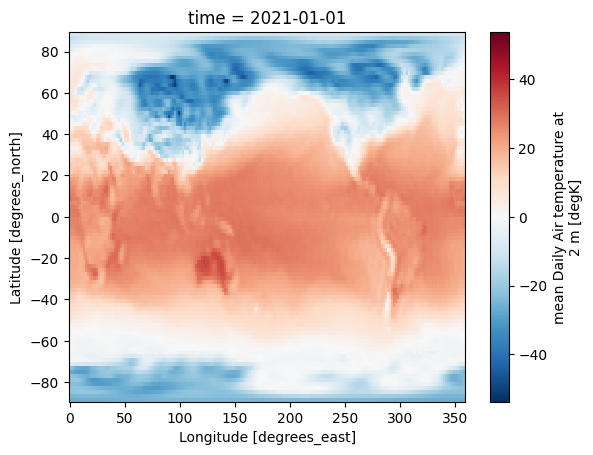

In [12]:
ds.air[0,:,:].plot()

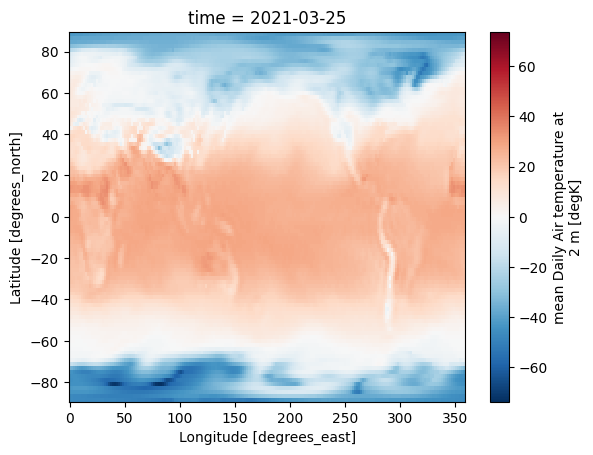

In [13]:
ds.air.sel(time='2021-03-25').plot()

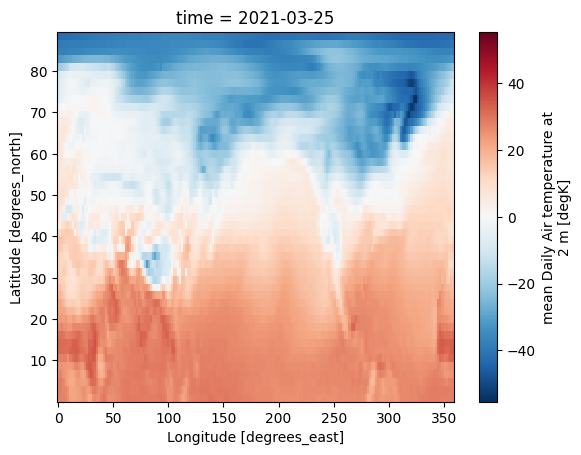

In [14]:
ds.air.sel(time='2021-03-25', lon=slice(0,360), lat=slice(90,0)).plot()

In [15]:
ds.air.sel(time=slice('2021-03-1','2021-03-31'), lon=slice(0,360), lat=slice(90,0))

<xarray.DataArray 'air' (time: 31, lat: 47, lon: 192)> Size: 1MB
array([[[-33.225006, -33.449997, -33.649994, ..., -32.299988,
         -32.550003, -32.850006],
        [-33.22499 , -33.34999 , -33.475006, ..., -32.475006,
         -32.774994, -33.      ],
        [-30.59999 , -30.574997, -30.549988, ..., -30.549988,
         -30.574997, -30.59999 ],
        ...,
        [ 27.875   ,  28.425018,  28.399994, ...,  26.024994,
          26.37503 ,  26.975006],
        [ 27.350006,  27.375   ,  27.175018, ...,  27.774994,
          27.50003 ,  27.199982],
        [ 27.700012,  27.774994,  27.575012, ...,  27.774994,
          27.700012,  27.550018]],

       [[-34.949997, -35.049988, -35.125   , ..., -34.44998 ,
         -34.625   , -34.799988],
        [-37.02498 , -37.100006, -37.125   , ..., -36.725006,
         -36.799988, -36.924988],
        [-34.649994, -34.675003, -34.72499 , ..., -34.72499 ,
         -34.649994, -34.625   ],
...
        [ 27.375   ,  28.175018,  28.175018, ...,  27.00003 ,
          27.25    ,  26.924988],
        [ 27.800018,  28.100006,  27.975006, ...,  28.075012,
          27.899994,  27.600006],
        [ 28.100006,  28.049988,  27.850006, ...,  27.825012,
          27.774994,  27.875   ]],

       [[-19.149994, -19.274994, -19.349976, ..., -18.949997,
         -19.024994, -19.074982],
        [-16.75    , -16.674988, -16.674988, ..., -17.      ,
         -16.924988, -16.824982],
        [-14.125   , -13.899994, -13.625   , ..., -15.324982,
         -14.774994, -14.399994],
        ...,
        [ 27.575012,  28.450012,  28.475006, ...,  27.424988,
          27.375   ,  27.050018],
        [ 27.850006,  28.150024,  27.925018, ...,  28.25    ,
          27.824982,  27.549988],
        [ 28.375   ,  28.37503 ,  28.175018, ...,  27.825012,
          27.875   ,  28.075012]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 188B 88.54 86.65 84.75 82.85 ... 4.762 2.857 0.9524
  * lon      (lon) float32 768B 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
  * time     (time) datetime64[ns] 248B 2021-03-01 2021-03-02 ... 2021-03-31
Attributes:
    long_name:     mean Daily Air temperature at 2 m
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NCEP Reanalysis Daily Averages
    level_desc:    2 m
    statistic:     Mean
    parent_stat:   Individual Obs
    valid_range:   [150. 400.]
    actual_range:  [178.1   317.025]

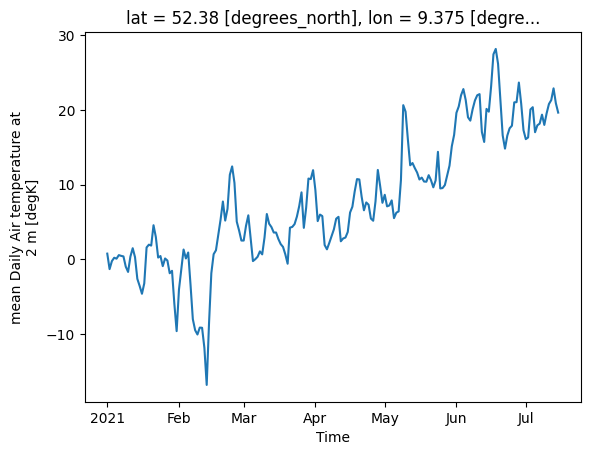

In [16]:
ds.air.sel(lon=8.8, lat=53.083333, method='nearest', tolerance=5).plot()

## Compare with observational data

In [17]:
data_reanalysis = ds.air.sel(lon=8.8, lat=53.083333, method='nearest', tolerance=5).to_pandas()

In [18]:
tbremen = pd.read_csv('../data/Bremen_average.txt',skiprows=22,
                   delimiter=r"\s+", parse_dates=[[0,1,2]], header=None)
tbremen.columns = ['Date', 'Temp']
tbremen = tbremen.set_index(['Date'])

/tmp/ipykernel_64/1424761315.py:1: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  tbremen = pd.read_csv('../data/Bremen_average.txt',skiprows=22,


Just plot data for 2021

In [20]:
tbremen

,Temp
Date,
1890-01-02,-5.35
1890-01-03,-2.40
1890-01-04,1.90
1890-01-05,3.95
1890-01-06,7.80
...,...
2021-05-27,11.80
2021-05-28,11.85
2021-05-29,10.10


<Axes: xlabel='Date'>

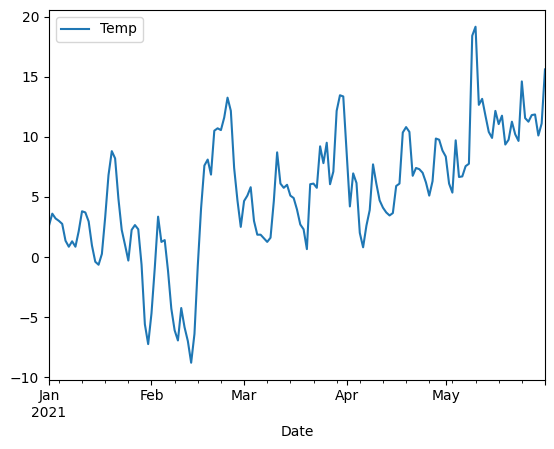

In [21]:
tbremen.loc['2021'].plot()

Create new variable with only 2021 data from observations

In [22]:
data2021 = tbremen.loc['2021']

Add reanalysis data to this variable

In [23]:
data2021['reanalysis'] = data_reanalysis

<Axes: xlabel='Date'>

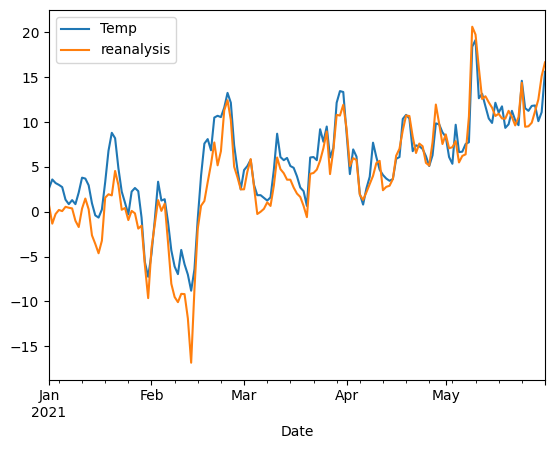

In [24]:
data2021.plot()

In [25]:
data2021

,Temp,reanalysis
Date,,
2021-01-01,2.60,0.750031
2021-01-02,3.60,-1.324982
2021-01-03,3.20,-0.250000
2021-01-04,3.00,0.199982
2021-01-05,2.75,0.075012
...,...,...
2021-05-27,11.80,9.925018
2021-05-28,11.85,11.199982
2021-05-29,10.10,12.525024


Plot difference

<Axes: xlabel='Date'>

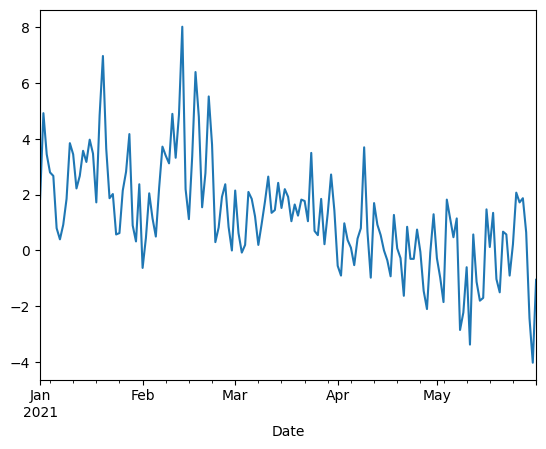

In [26]:
(data2021['Temp']-data2021['reanalysis']).plot()

## Reasons for the differentces:

- Models are just aproximate respresenttions of reality, and Reanalysis is also result of the model simulations, although with data assimilation.
- The observational point and the point in the model are quite far away
- Observtional data can also be wrong sometimes
- make sure you compare same parameters/averaging periods.
- Make sure the units are the same

let's plot the points

In [28]:
pip install cartopy

  Using cached Cartopy-0.23.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.0 kB)
  Using cached shapely-2.0.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (7.0 kB)
  Using cached pyshp-2.3.1-py2.py3-none-any.whl.metadata (55 kB)
  Using cached pyproj-3.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (31 kB)
Using cached Cartopy-0.23.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.7 MB)
Using cached pyproj-3.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.6 MB)
Using cached pyshp-2.3.1-py2.py3-none-any.whl (46 kB)
Using cached shapely-2.0.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.5 MB)
Note: you may need to restart the kernel to use updated packages.


In [29]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [30]:
point = ds.air.sel(lon=8.8, lat=53.083333, method='nearest', tolerance=5)

Here is the coordinates ther were selected:

In [31]:
point.lon.data

array(9.375, dtype=float32)

In [32]:
point.lat.data

array(52.3799, dtype=float32)

As you can see they are quire far away from each other

/opt/conda/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


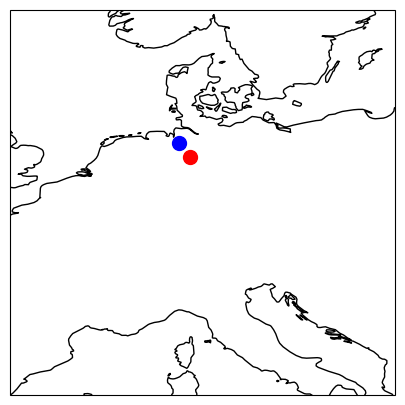

In [33]:
plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m', color='k')
ax.set_extent((0,20,40,60), crs=ccrs.PlateCarree())
ax.scatter(8.8, 53.083333, 100, transform=ccrs.PlateCarree(), color='b')
ax.scatter(9.375, 52.3799, 100, transform=ccrs.PlateCarree(), color='r')

Let's plot reanalysis data:

In [34]:
lon = ds.lon.data
lat = ds.lat.data
temp = ds.air[0,:,:].data

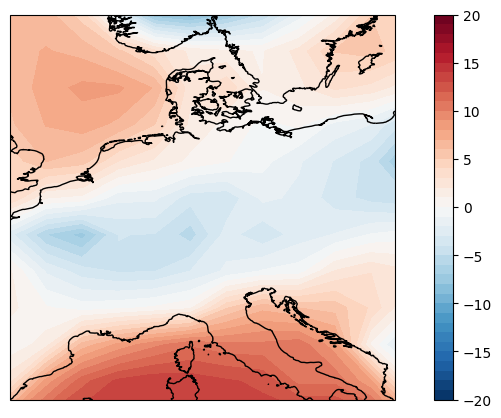

In [35]:
plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m', color='k')

ax.set_extent((0,20,40,60), crs=ccrs.PlateCarree())

img = ax.contourf(lon, lat, 
            temp, levels=np.linspace(-20, 20, 41), 
            cmap=cm.RdBu_r, transform=ccrs.PlateCarree())
plt.colorbar(img)

We usually plot contour maps, but model data located on the grid, and this particular data are quite low resolution. So if we visualise the grid cells, one can see how low the resolution of this reanalysis is.

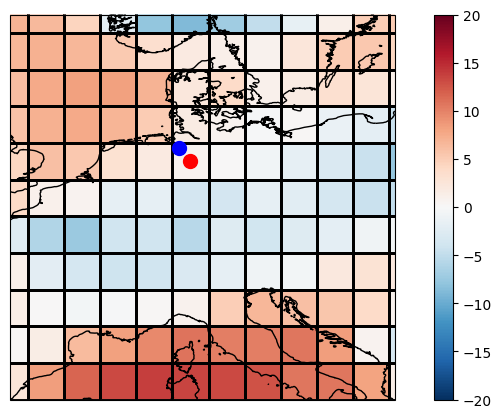

In [36]:
plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m', color='k')

ax.set_extent((0,20,40,60), crs=ccrs.PlateCarree())

img = ax.pcolormesh(lon, lat, 
            temp, 
            cmap=cm.RdBu_r, transform=ccrs.PlateCarree(), vmin=-20, vmax=20,
                   edgecolors='k')
plt.colorbar(img)
ax.scatter(8.8, 53.083333, 100, transform=ccrs.PlateCarree(), color='b')
ax.scatter(9.375, 52.3799, 100, transform=ccrs.PlateCarree(), color='r')